In [35]:
%pwd

'C:\\Users\\Baron\\Desktop\\EE_257_Repo\\EE_257\\%ML_PATH_EE257%\\EE257_env\\Assignments\\Project'

In [36]:
# Libararies Associated 
# %load ../standard_import.txt

import pandas as pd # Library associated with machine learning functions
import numpy as np # NumPy is the fundamental package for scientific computing in Python 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

# Classification Models:

# Linear Models
import sklearn.linear_model as skl_lm # Linear Model
from sklearn.model_selection import train_test_split


#LDA and QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Logistical Regression
from sklearn.linear_model import LogisticRegression

# Libraries for the Confusion Matrix, Classification report and the precision score
from sklearn.metrics import confusion_matrix, classification_report, precision_score



#Processing? Neighbors for KNN
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score


# Stats models
import statsmodels.api as sm
import statsmodels.formula.api as smf

import random
import array


In [37]:
dataset = pd.read_csv("data.csv", delimiter = ";")


In [38]:
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [39]:
#Create histogram plots from the Specific Categories
#.hist(bins = 20, figsize = (10,8))
#plt.figure()

#.hist(bins = 20, figsize = (10,8))
#plt.show()
#.hist(bins = 20, figsize = (10,8))
#plt.show()
#.hist(bins = 20, figsize = (10,8))
#plt.show()
#.hist(bins = 20, figsize = (10,8))
#plt.show()

In [40]:
dataset.describe()

# Only used if the dataset has no missing elements
#dataset_clean = dataset.dropna()
#dataset_clean.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [41]:
#Numerize the dataset for visualization

for index, column_name in enumerate(dataset.columns):
    print(index, column_name)


0 Marital status
1 Application mode
2 Application order
3 Course
4 Daytime/evening attendance	
5 Previous qualification
6 Previous qualification (grade)
7 Nacionality
8 Mother's qualification
9 Father's qualification
10 Mother's occupation
11 Father's occupation
12 Admission grade
13 Displaced
14 Educational special needs
15 Debtor
16 Tuition fees up to date
17 Gender
18 Scholarship holder
19 Age at enrollment
20 International
21 Curricular units 1st sem (credited)
22 Curricular units 1st sem (enrolled)
23 Curricular units 1st sem (evaluations)
24 Curricular units 1st sem (approved)
25 Curricular units 1st sem (grade)
26 Curricular units 1st sem (without evaluations)
27 Curricular units 2nd sem (credited)
28 Curricular units 2nd sem (enrolled)
29 Curricular units 2nd sem (evaluations)
30 Curricular units 2nd sem (approved)
31 Curricular units 2nd sem (grade)
32 Curricular units 2nd sem (without evaluations)
33 Unemployment rate
34 Inflation rate
35 GDP
36 Target


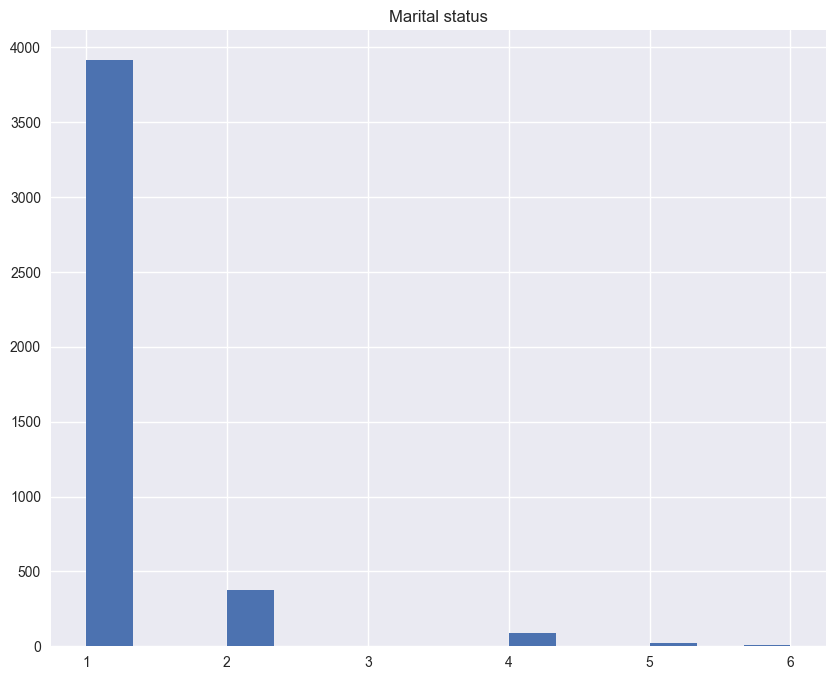

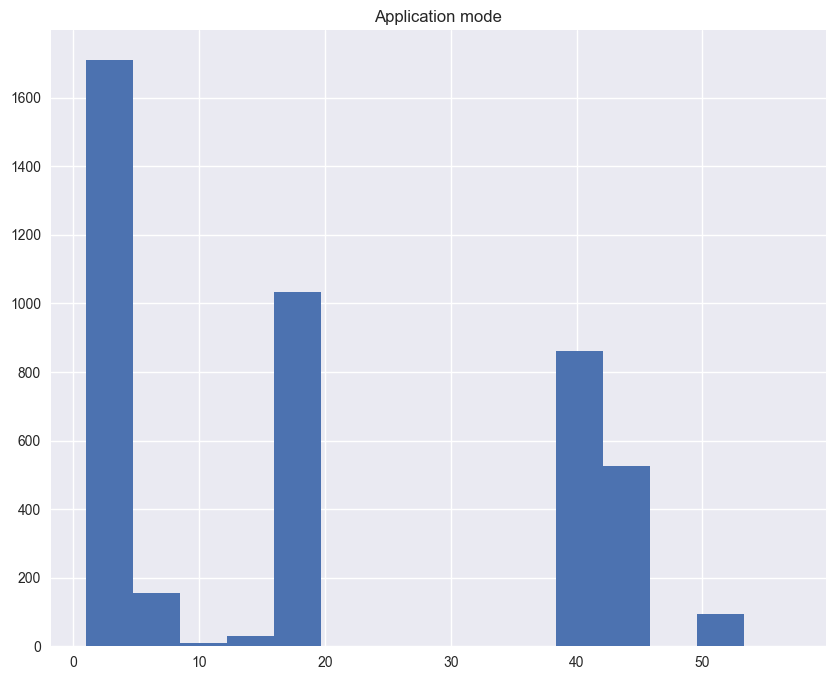

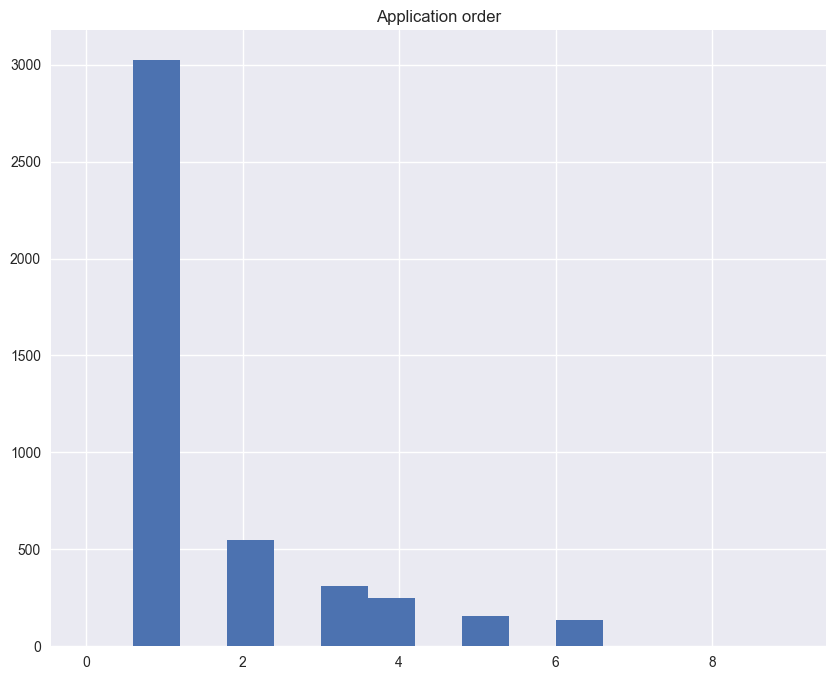

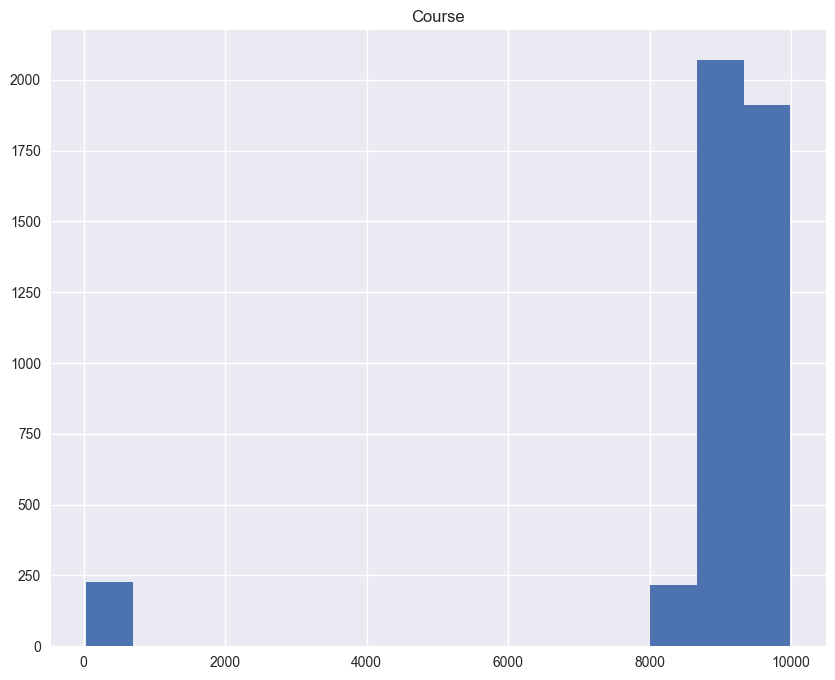

C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


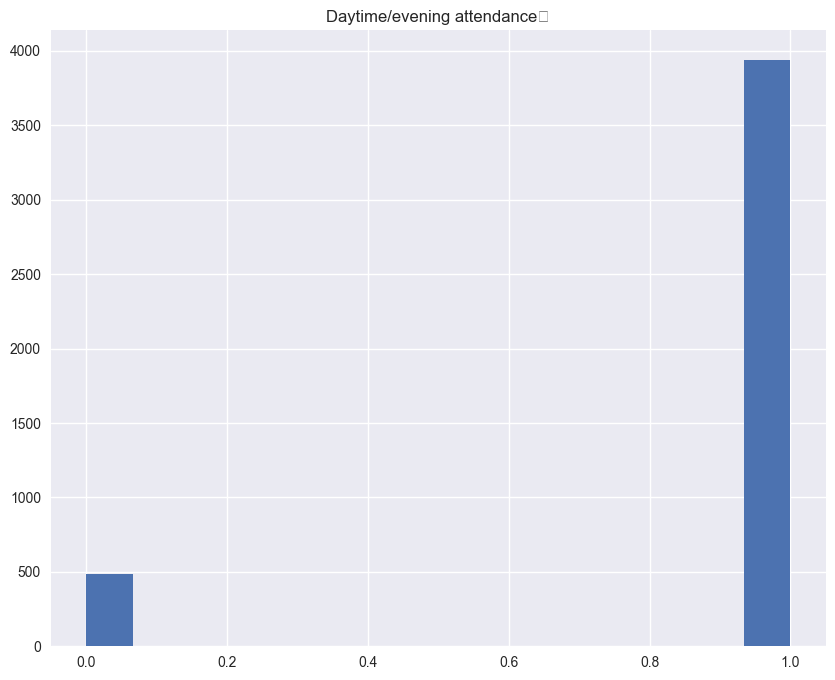

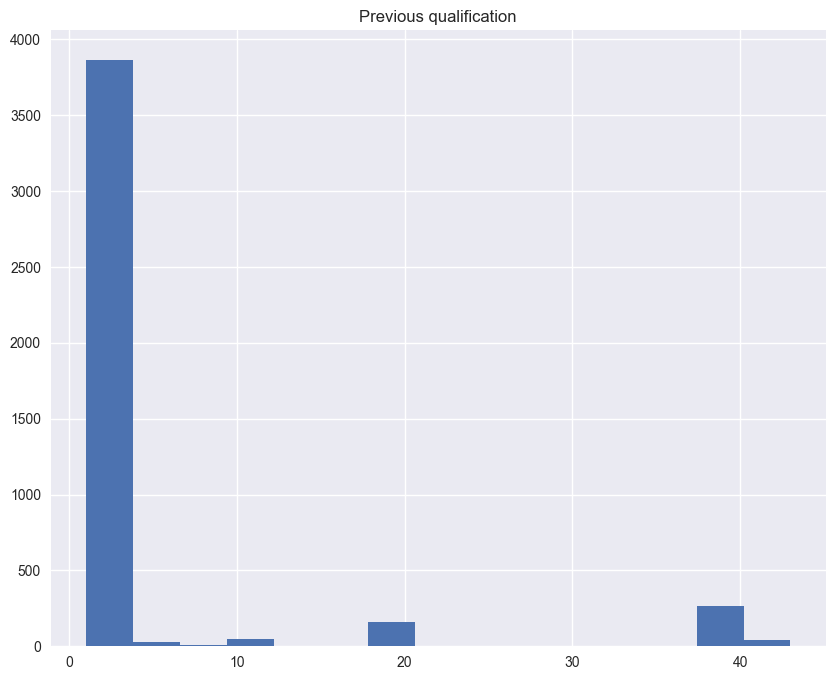

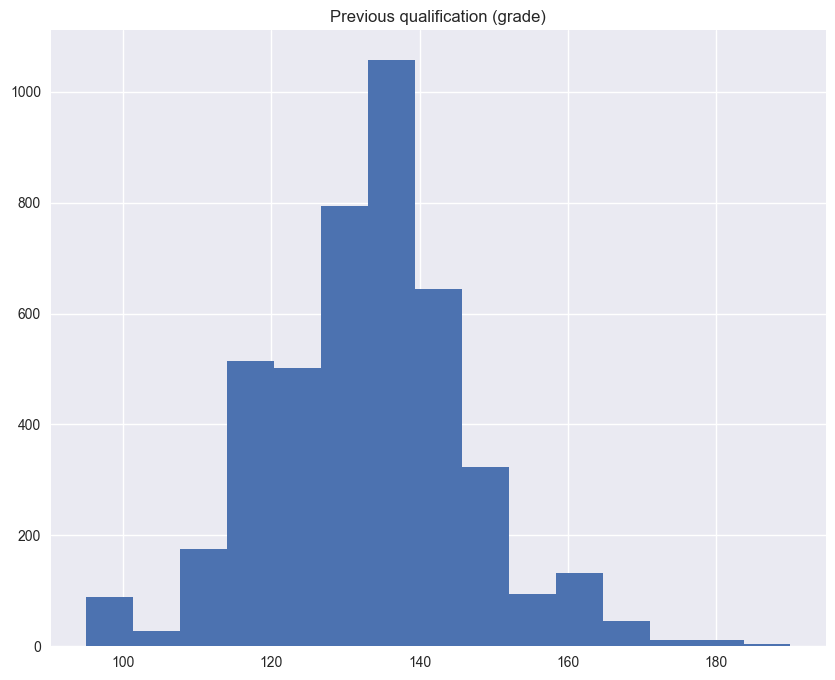

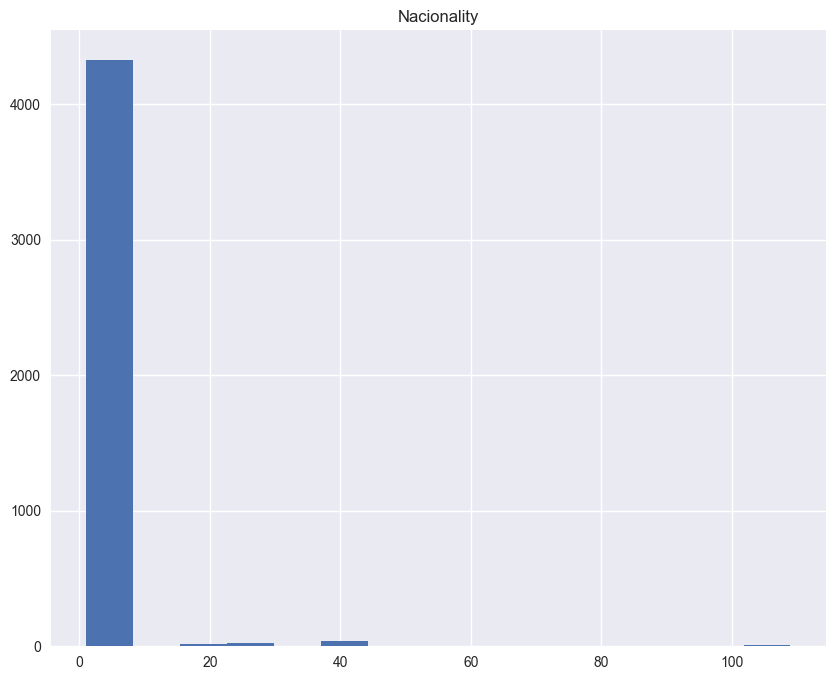

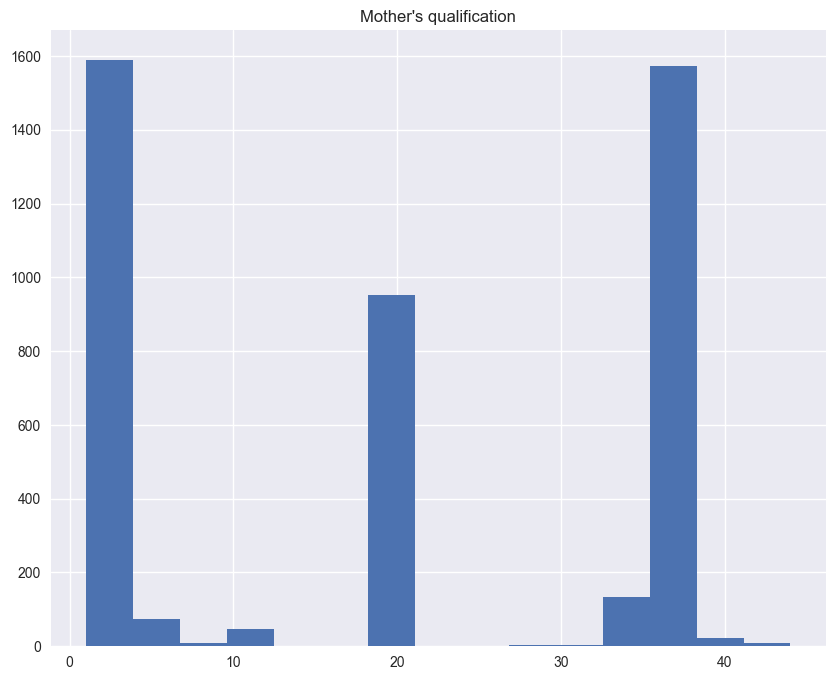

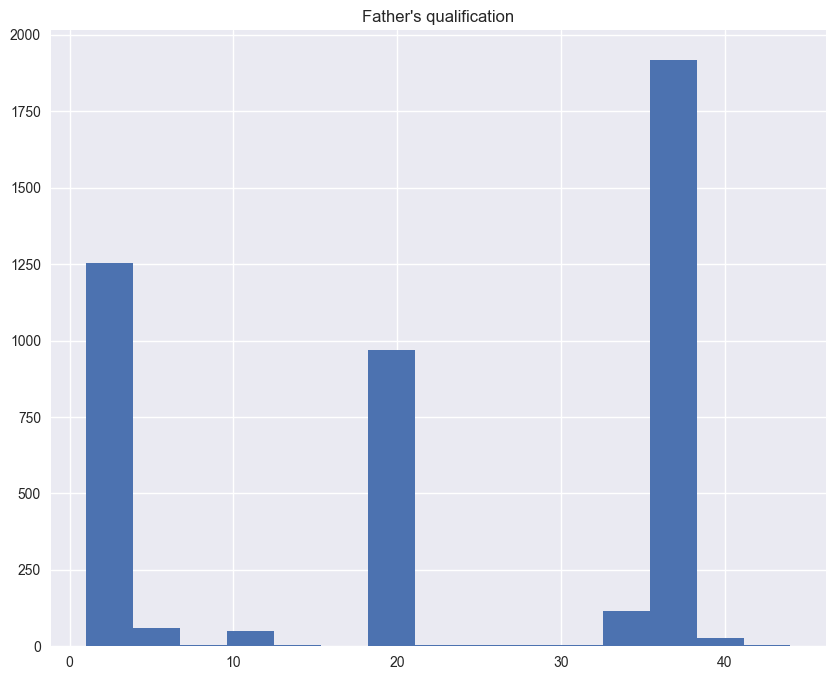

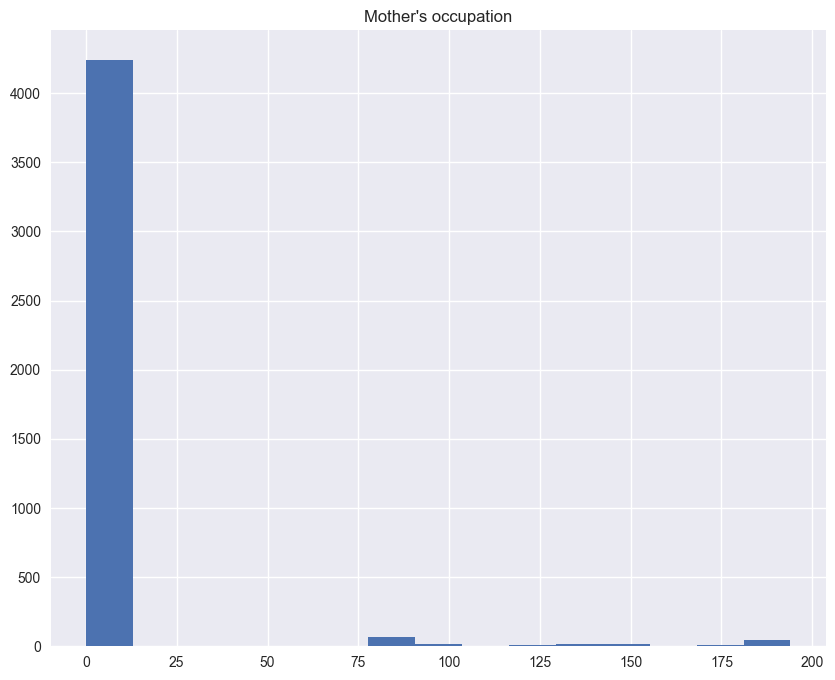

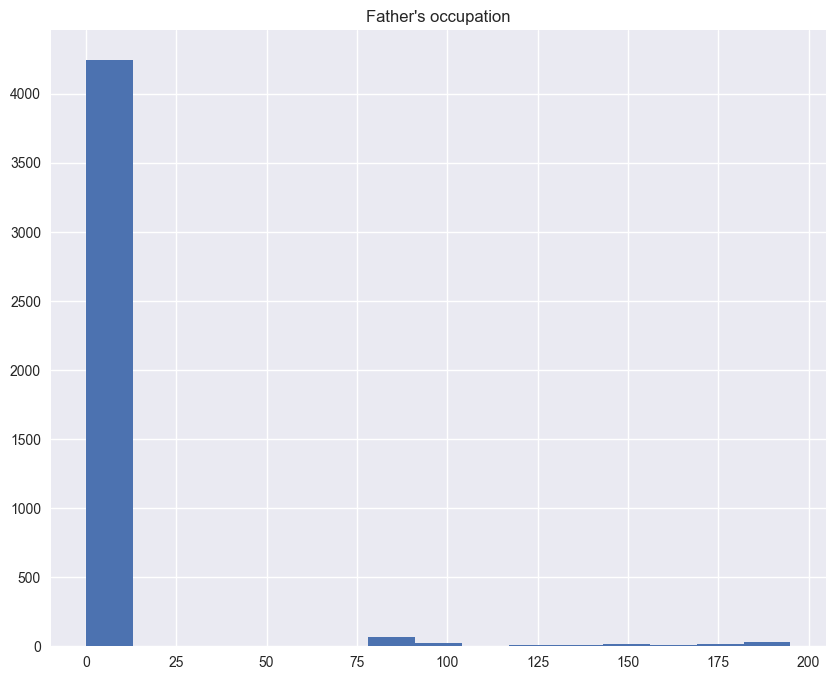

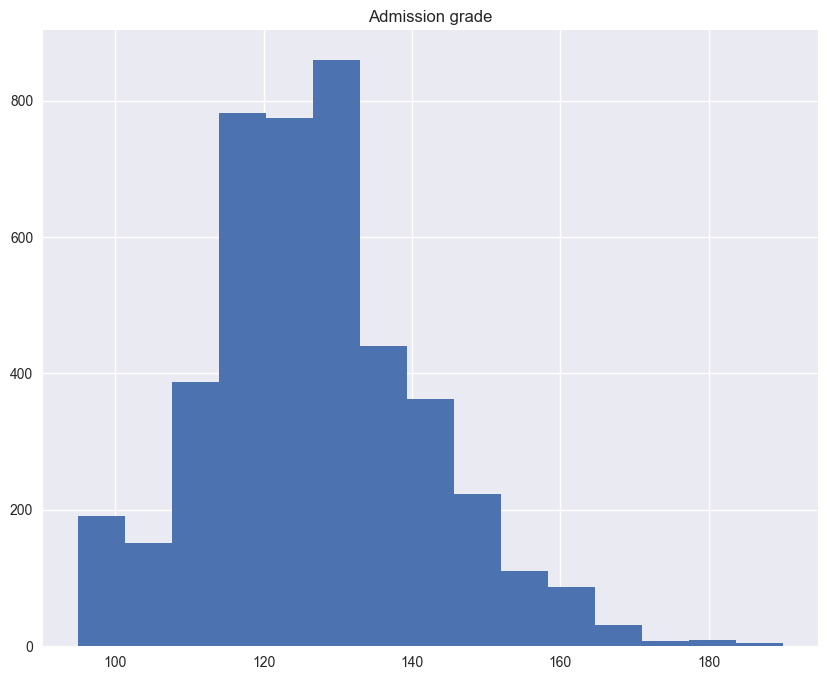

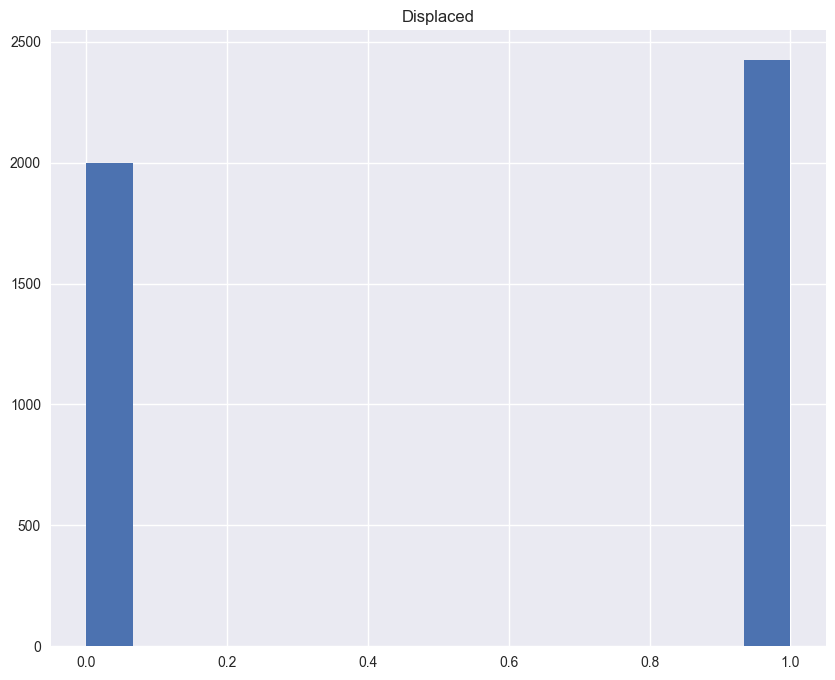

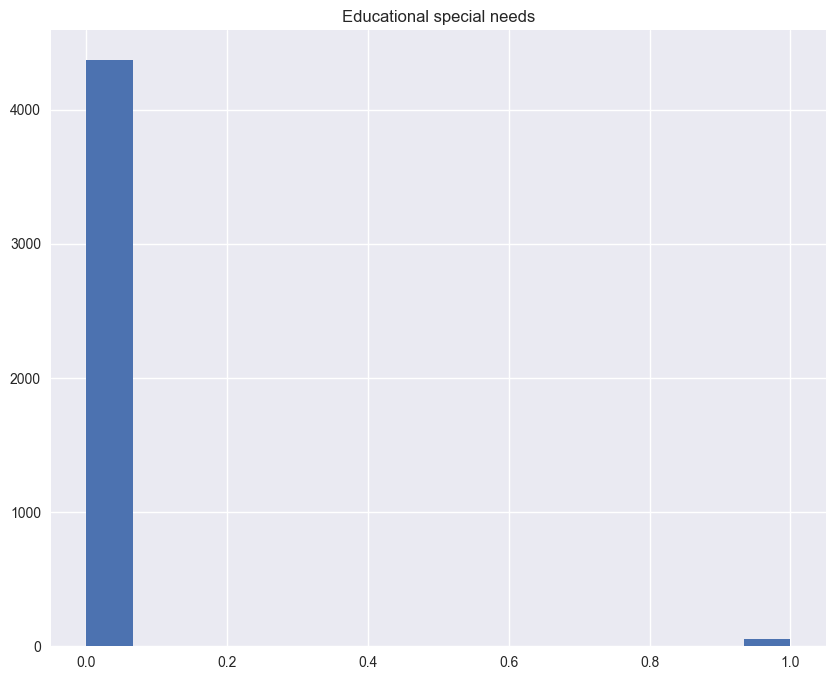

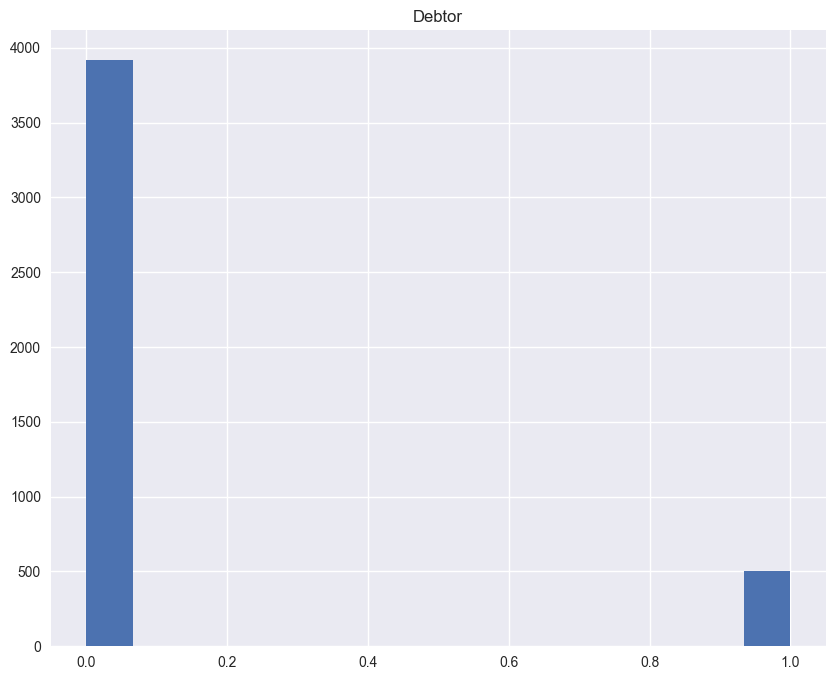

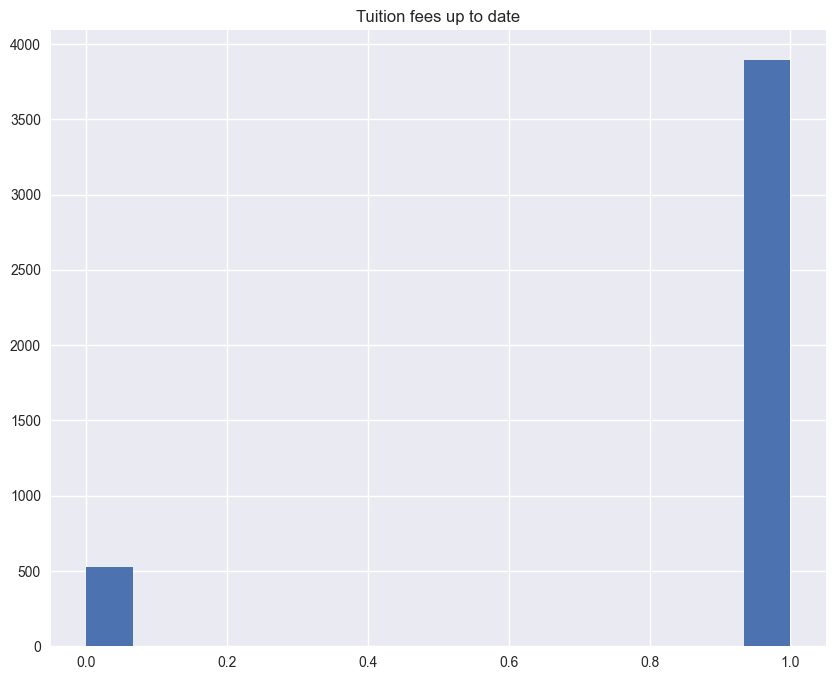

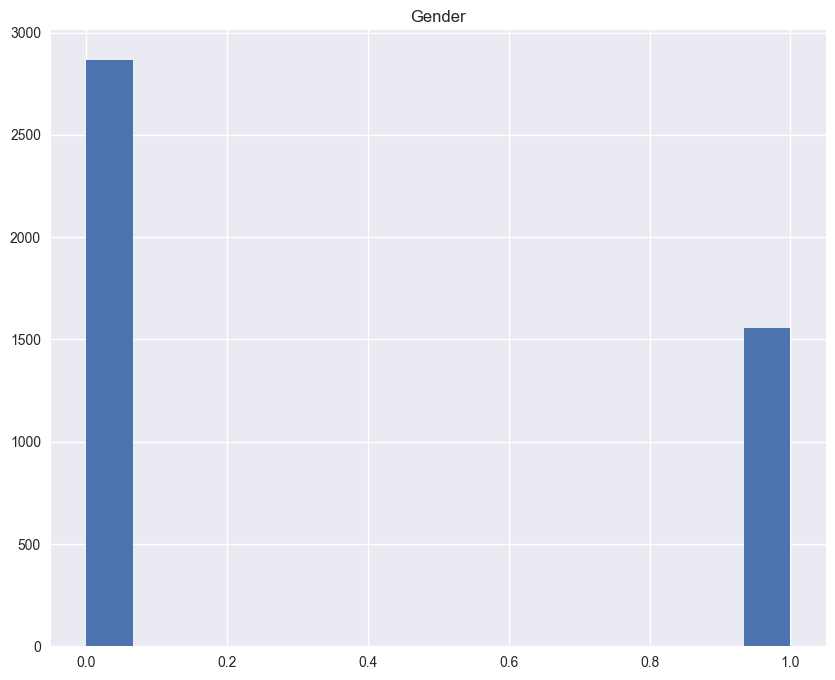

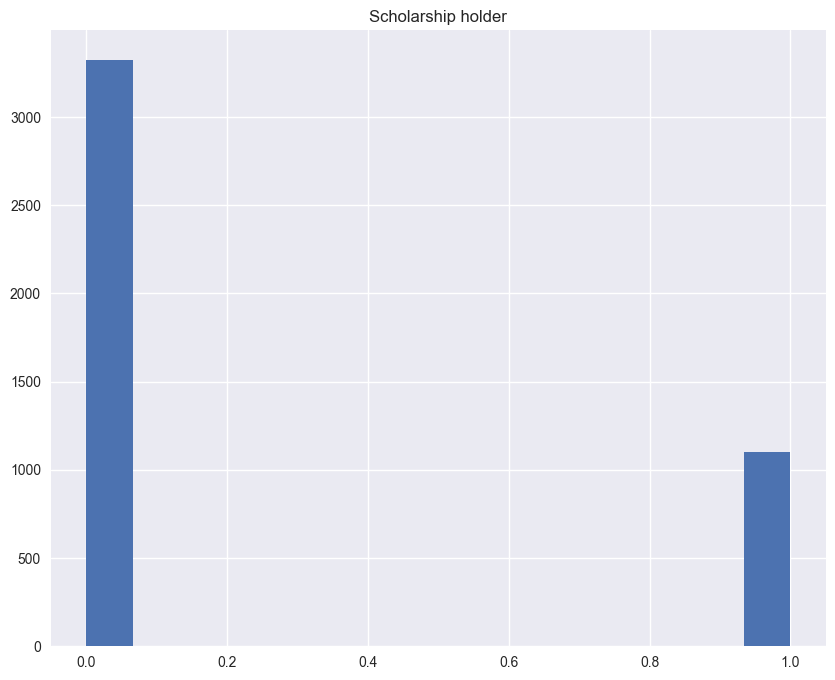

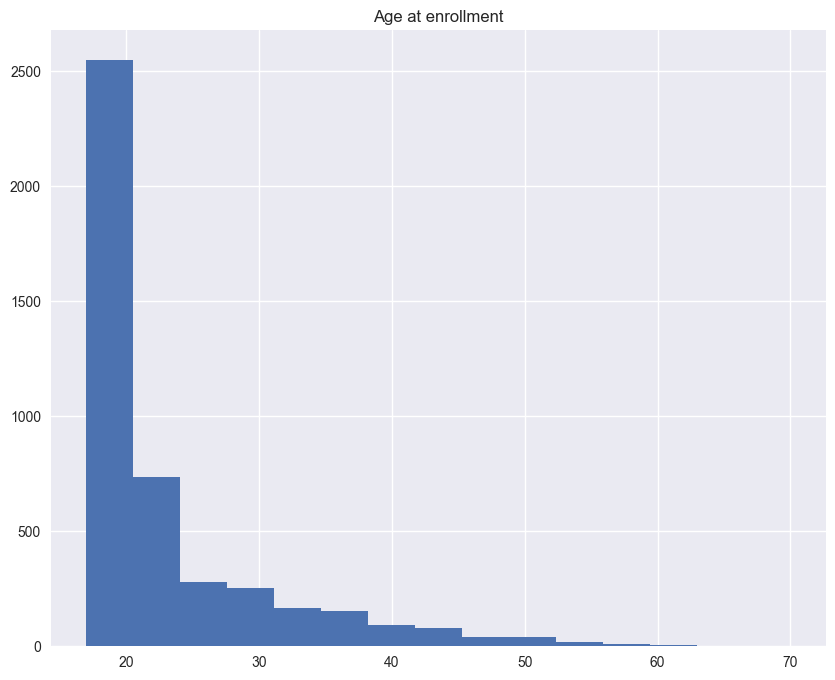

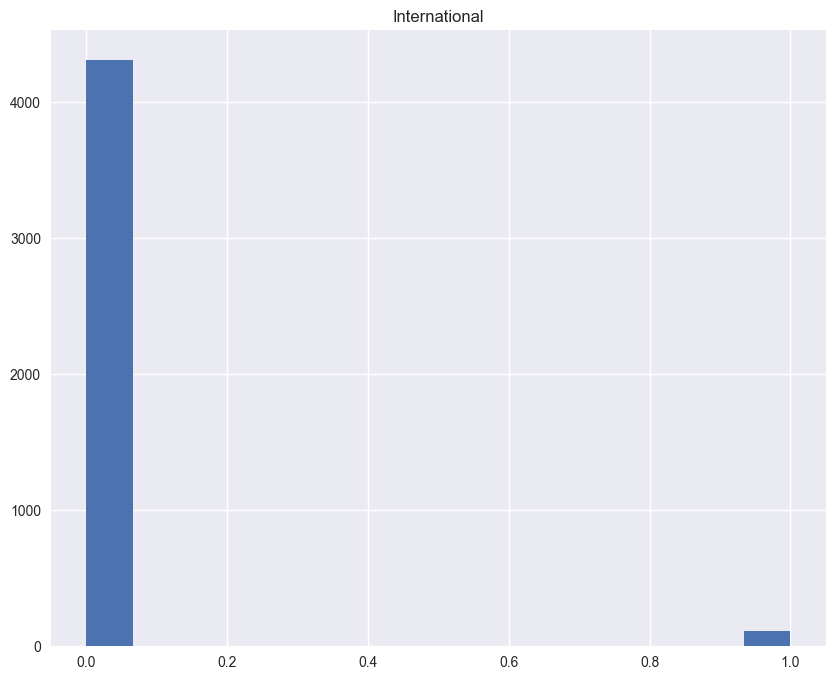

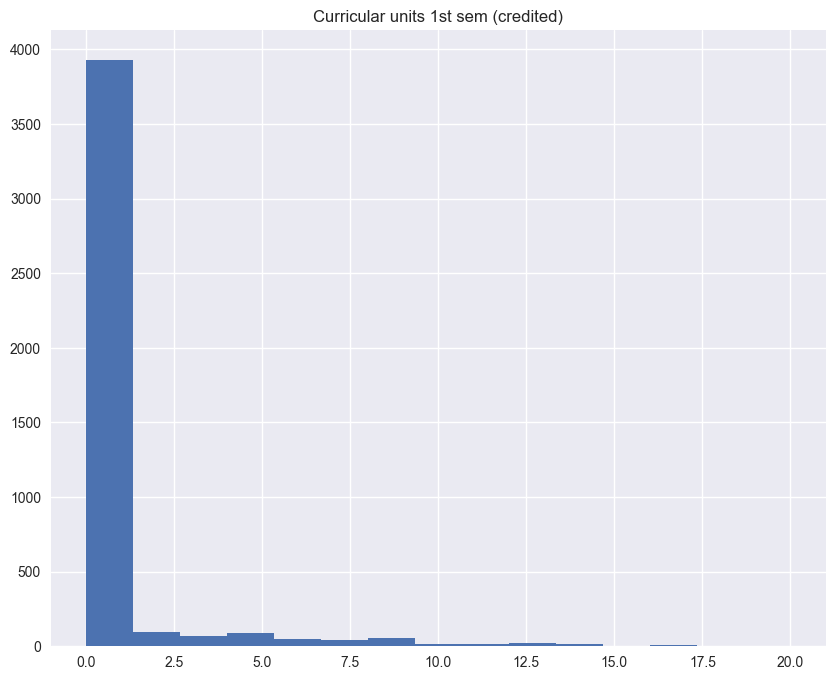

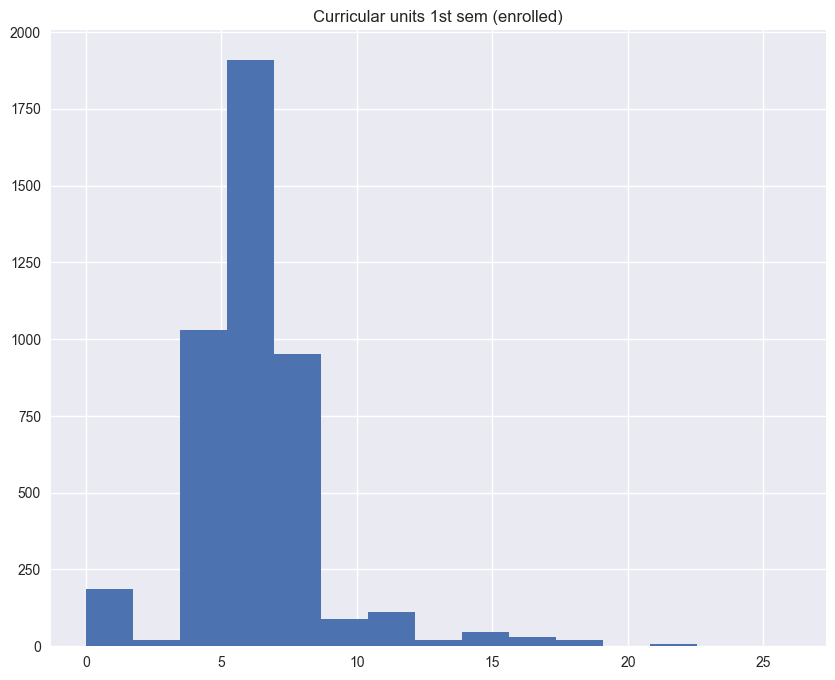

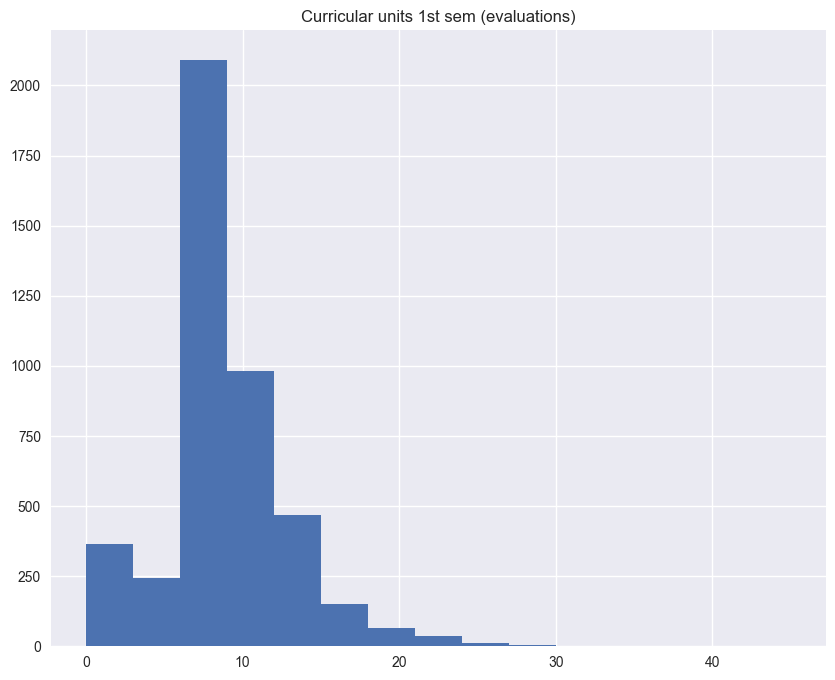

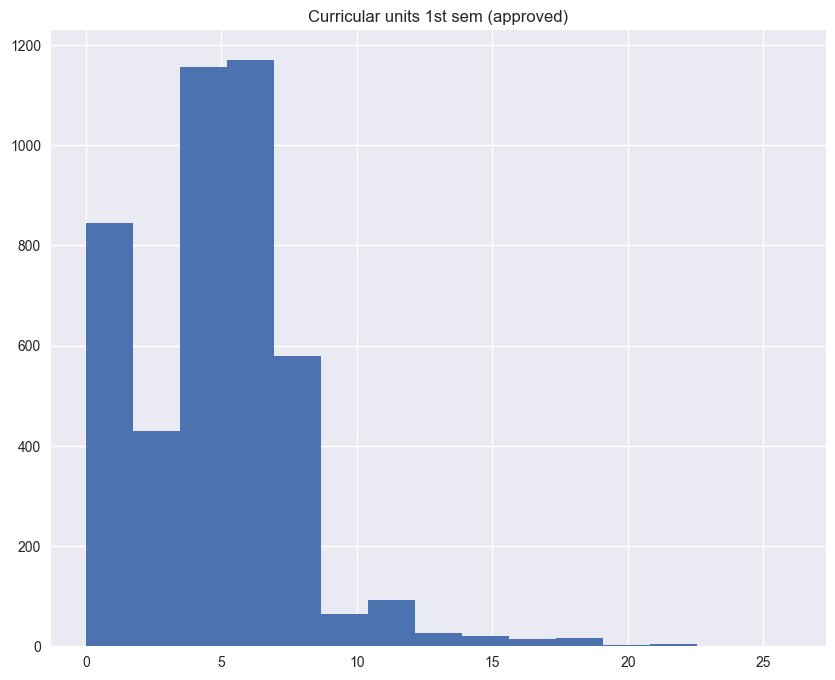

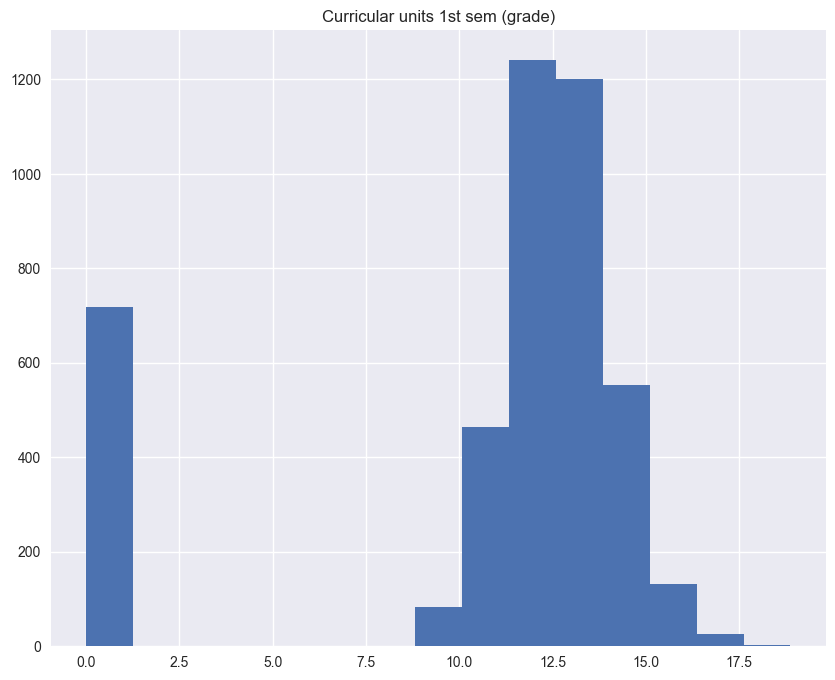

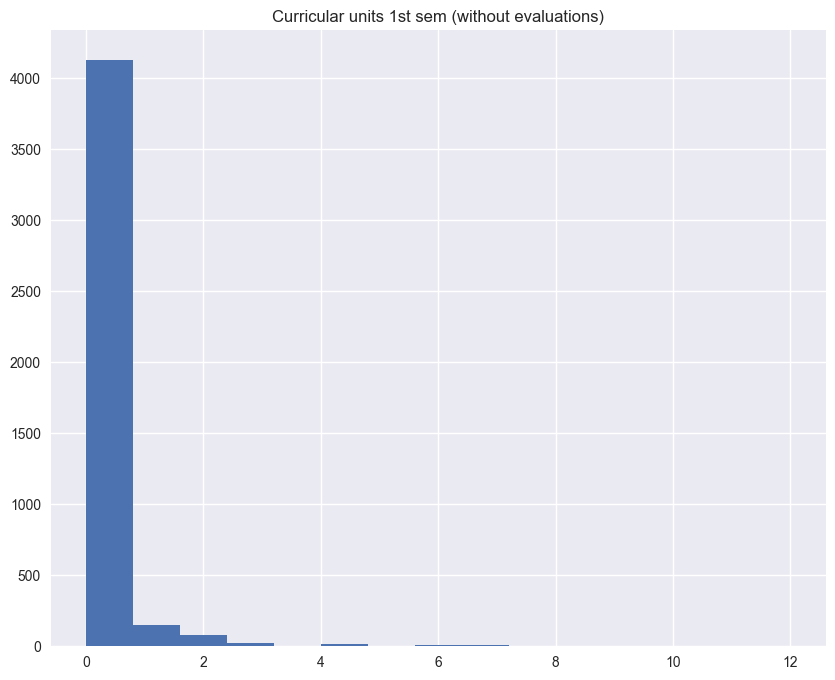

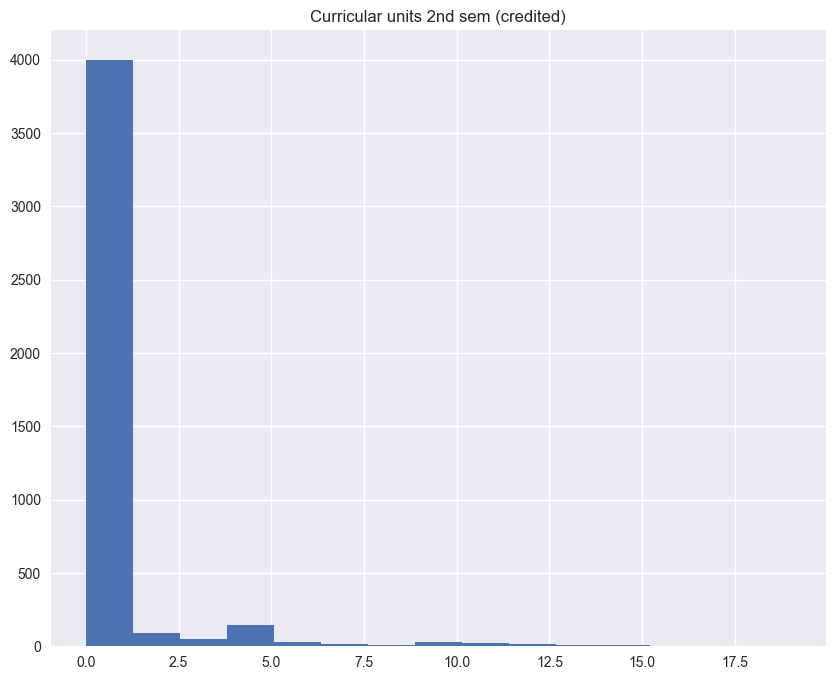

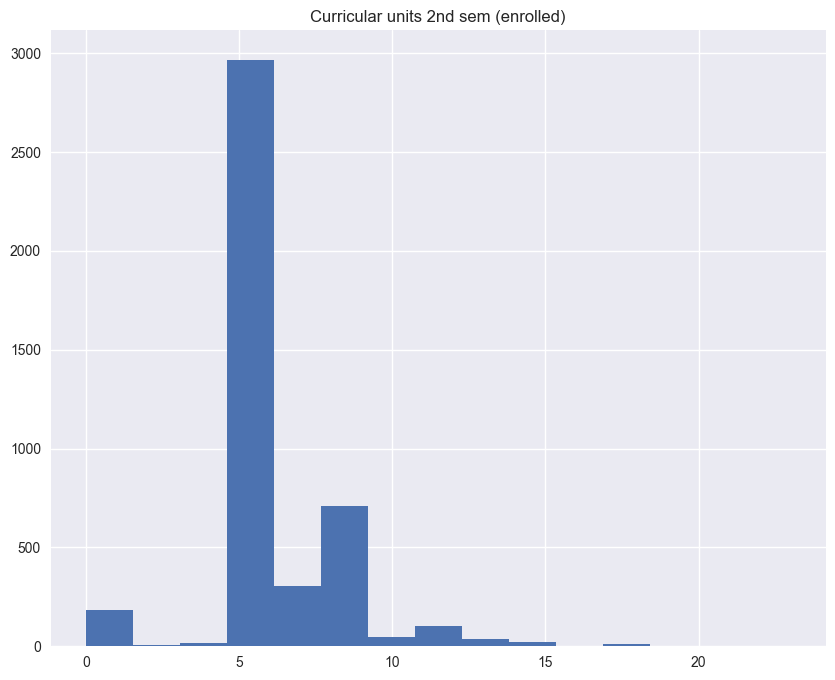

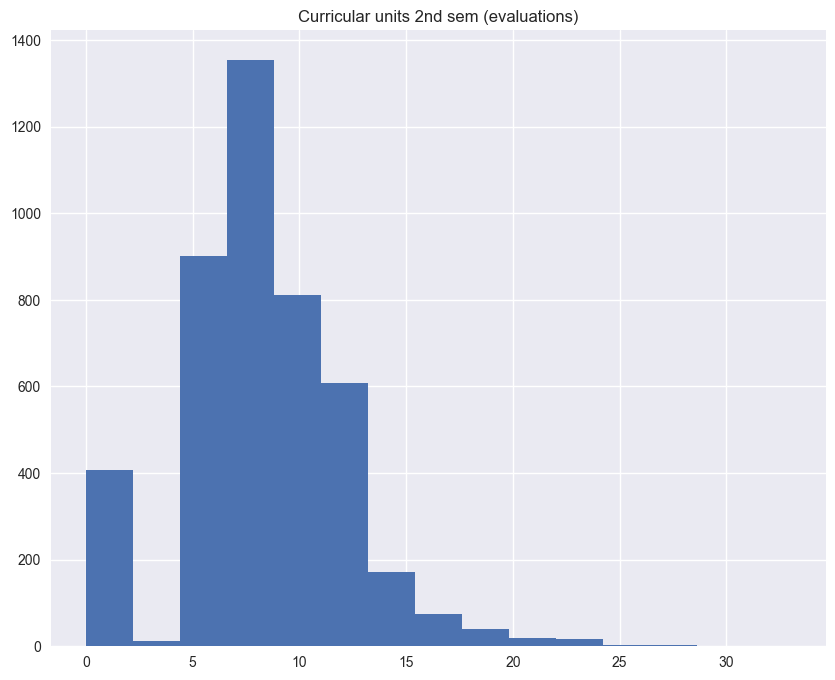

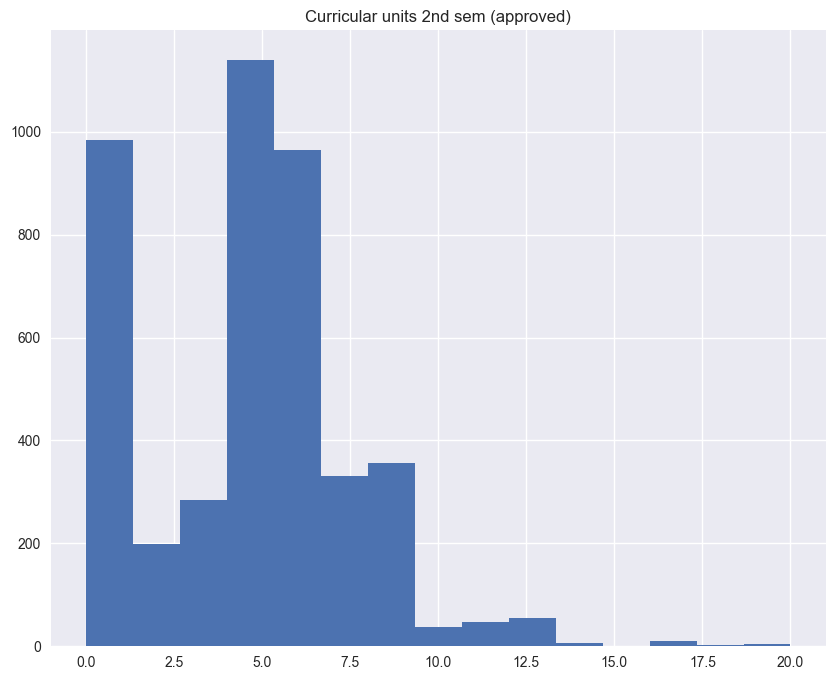

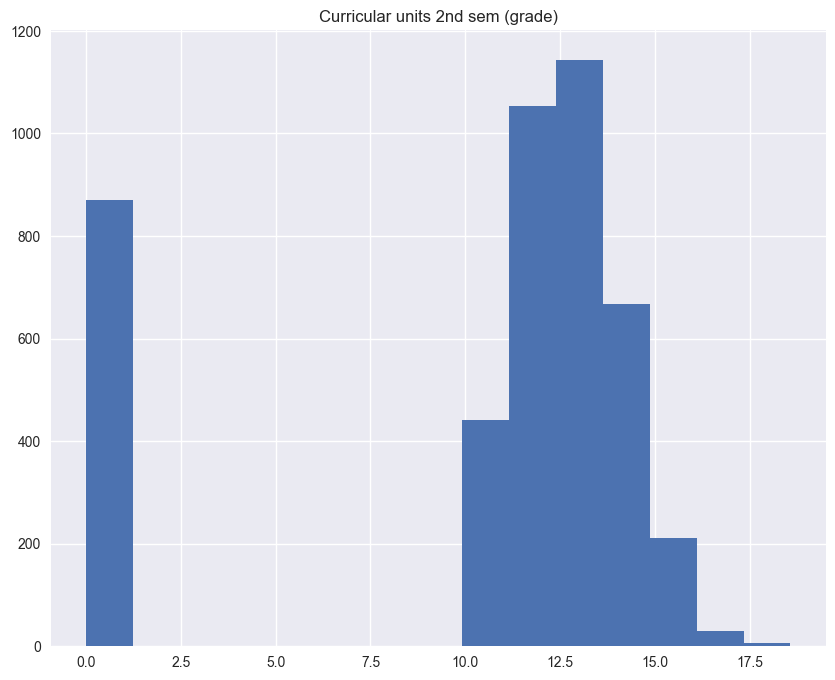

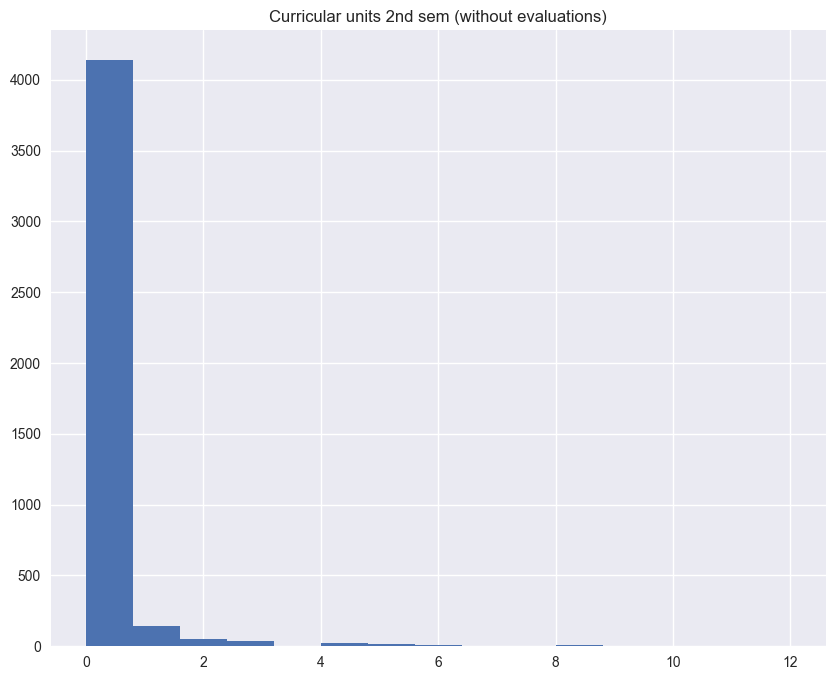

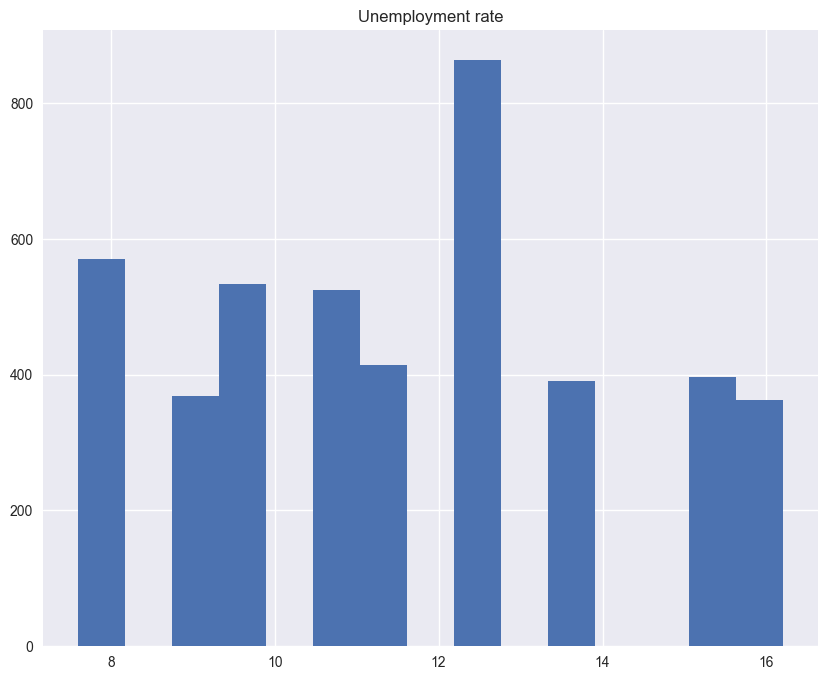

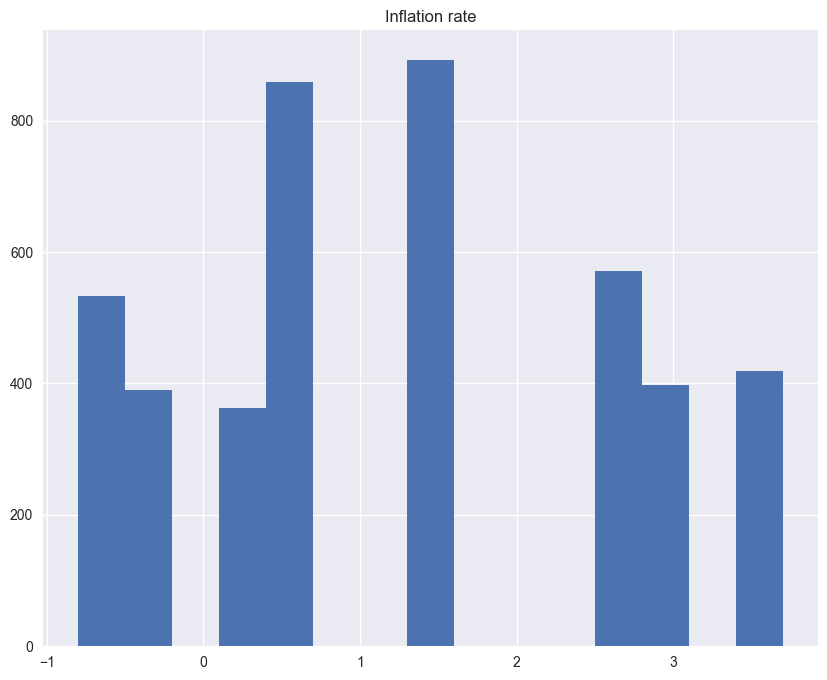

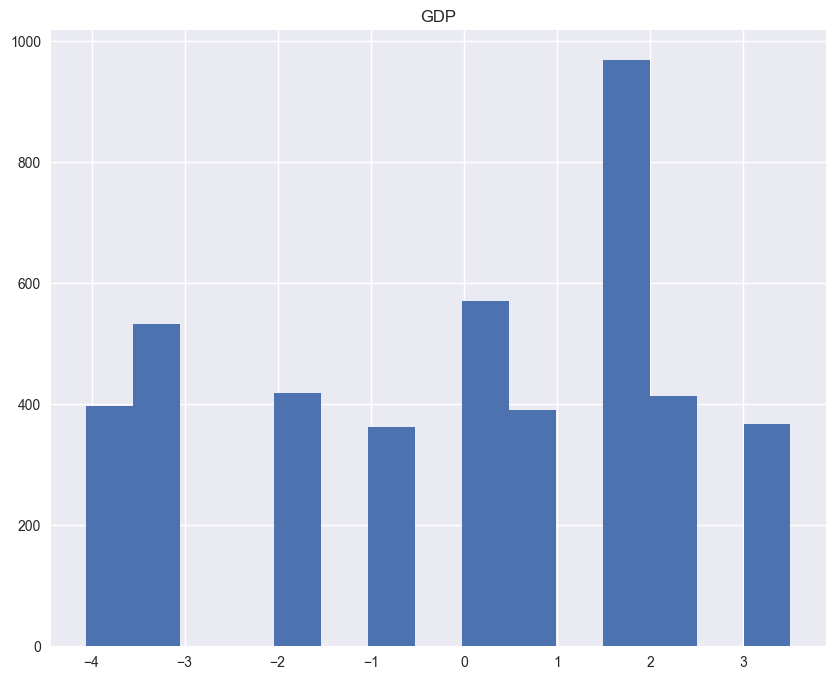

In [42]:
# Plot the data to visualize the dataset
%matplotlib inline 
import matplotlib.pyplot as plt

#Show only 1 data set
#dataset["Marital status"]
#dataset["Application mode"]

#Describe the dataset as bins
#dataset["Marital status"].hist(bins = 20, figsize = (10,8))
#plt.show() 
#dataset["Application mode"].hist(bins = 20, figsize = (10,8))

for x in range((len(dataset.columns)-1)):
    dataset.hist(column = (dataset.columns[x]), bins = 15, figsize = (10,8))
    plt.show()
    

<Axes: >

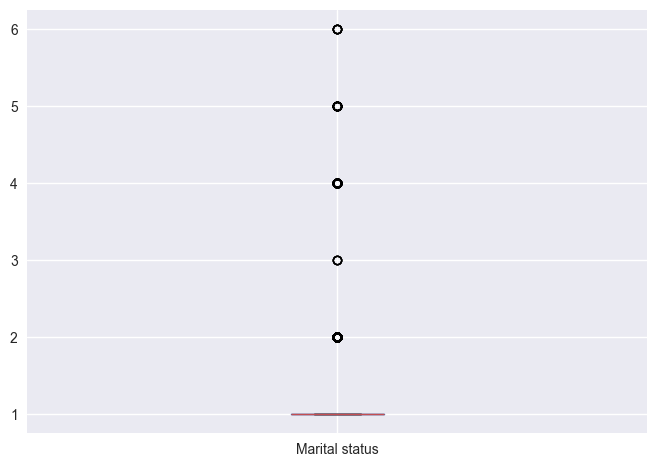

In [43]:
# Plotting the Box Plots
#dataset.boxplot(column = [dataset.columns[0], dataset.columns[1]])

#dataset.boxplot(column = [dataset.columns[0]])

dataset.boxplot(column=[dataset.columns[0]], by=None, ax=None, fontsize=None,
rot=0, grid=True, figsize=None, layout=None, return_type=None, backend=None) 


    

<Axes: xlabel='Previous qualification (grade)', ylabel='Admission grade'>

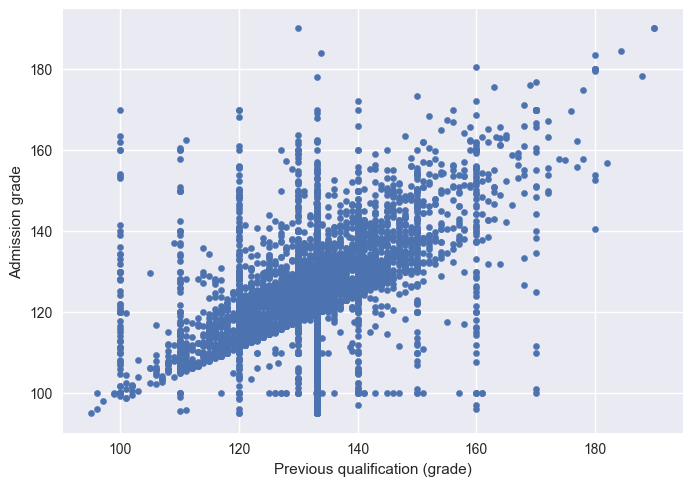

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

# Specify type of plot and the axes
dataset.plot(kind = "scatter", x="Previous qualification (grade)", y = "Admission grade")

In [45]:
# Understanding the correlation matrix
corr_matrix = dataset.corr(numeric_only = True, min_periods = 36)
corr_matrix



,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime/evening attendance\t,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.003183,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657
Father's qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,-0.017333,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610


In [46]:
#scartter matrix plot

from pandas.plotting import scatter_matrix
#How do we only show specific numbers?
#scatter_matrix(dataset, figsize=(8, 4))


In [47]:
# Asserting Linear Regression
#X = np.c_[np.ones((4424, 1)), dataset["Marital status"].values]
#
#y = dataset["Target"].values.reshape((4424,1)) 
#
#y.shape

In [48]:
%matplotlib inline
#Type of grid pane:
plt.style.use("seaborn-v0_8")

In [49]:
#Numerize the dataset for visualization

for index, column_name in enumerate(dataset.columns):
    print(index, column_name)

0 Marital status
1 Application mode
2 Application order
3 Course
4 Daytime/evening attendance	
5 Previous qualification
6 Previous qualification (grade)
7 Nacionality
8 Mother's qualification
9 Father's qualification
10 Mother's occupation
11 Father's occupation
12 Admission grade
13 Displaced
14 Educational special needs
15 Debtor
16 Tuition fees up to date
17 Gender
18 Scholarship holder
19 Age at enrollment
20 International
21 Curricular units 1st sem (credited)
22 Curricular units 1st sem (enrolled)
23 Curricular units 1st sem (evaluations)
24 Curricular units 1st sem (approved)
25 Curricular units 1st sem (grade)
26 Curricular units 1st sem (without evaluations)
27 Curricular units 2nd sem (credited)
28 Curricular units 2nd sem (enrolled)
29 Curricular units 2nd sem (evaluations)
30 Curricular units 2nd sem (approved)
31 Curricular units 2nd sem (grade)
32 Curricular units 2nd sem (without evaluations)
33 Unemployment rate
34 Inflation rate
35 GDP
36 Target


In [50]:
# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object.

df = dataset
df['Marital_status2'] = df['Marital status'].factorize()[0]

df['Target2'] = df['Target'].factorize()[0]

#yields: 
    #Dropout = 0
    #Graduate = 1
    #Enrolled = 2

#df['Marital status2']
#df['Application mode2']
df.head(100)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Marital_status2,Target2
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,15,1,9119,1,1,130.0,26,38,3,...,11,3,13.250000,0,13.9,-0.3,0.79,Enrolled,0,2
96,1,1,5,9773,1,1,135.0,1,37,1,...,6,6,13.333333,0,8.9,1.4,3.51,Graduate,0,1
97,1,1,5,9500,1,1,132.0,1,37,37,...,9,8,14.477778,0,12.4,0.5,1.79,Graduate,0,1
98,1,1,1,9085,1,1,135.0,1,1,2,...,7,5,13.800000,0,12.7,3.7,-1.70,Enrolled,0,2


In [51]:
#Assert the features of the dataset
features = df[['Marital status',
                'Application mode',
                'Application order',
                'Course',
                'Daytime/evening attendance	',
                'Previous qualification',
                'Previous qualification (grade)',
                'Nacionality',
                "Mother's qualification",
                "Father's qualification",
                "Mother's occupation",
                "Father's occupation",
                'Admission grade',
                'Displaced',
                'Educational special needs',
                'Debtor',
                'Tuition fees up to date',
                'Gender',
                'Scholarship holder',
                'Age at enrollment',
                'International',
                'Curricular units 1st sem (credited)',
                'Curricular units 1st sem (enrolled)',
                'Curricular units 1st sem (evaluations)',
                'Curricular units 1st sem (approved)',
                'Curricular units 1st sem (grade)',
                'Curricular units 1st sem (without evaluations)',
                'Curricular units 2nd sem (credited)',
                'Curricular units 2nd sem (enrolled)',
                'Curricular units 2nd sem (evaluations)',
                'Curricular units 2nd sem (approved)',
                'Curricular units 2nd sem (grade)',
                'Curricular units 2nd sem (without evaluations)',
                'Unemployment rate',
                'Inflation rate',
                'GDP',
                ]]
#Asset the target
target = df['Target2'] 

In [52]:
#Creating Series from the dataset

#dataset_series = pd.Series()

In [53]:
# Group by Features
#groupby function
#groupby function
#Demographic_data = df_[['Marital_status', # Double brackets                     
#                'Nacionality',                                                                       
#                'Displaced',                                                     
#                'Gender',                          
#                'Age_at_enrollment',                                 
#                'International'                                                                                                                          
#            ]]
#Demographic_data.iloc[1]

In [54]:
# Create a sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [100, 200, 300, 400, 500]
}
df_ = pd.DataFrame(data)

# Selecting a column using iloc and creating a Series
series_from_column = pd.Series(df_.iloc[:, 1])  # Selecting all rows from column index 1
print("Series from column 'B':")
print(series_from_column)

# Selecting a row using iloc and creating a Series
series_from_row = pd.Series(df_.iloc[0, :])  # Selecting all columns from row index 0
print("\nSeries from row 0:")
print(series_from_row)

Series from column 'B':
0    10
1    20
2    30
3    40
4    50
Name: B, dtype: int64

Series from row 0:
A      1
B     10
C    100
Name: 0, dtype: int64


C:\Users\Baron\AppData\Local\Temp\ipykernel_24592\1432784420.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Target', y = 'Admission grade', data=df,  orient='v', ax=ax2, palette=c_palette)
C:\Users\Baron\AppData\Local\Temp\ipykernel_24592\1432784420.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Target', y = 'Previous qualification (grade)', data=df, orient='v', ax=ax3, palette=c_palette)


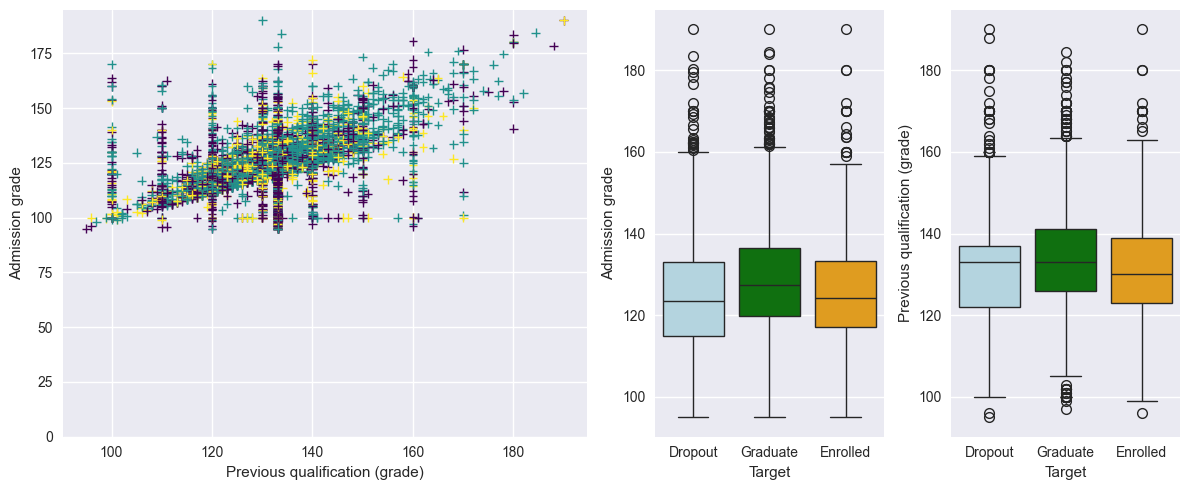

In [56]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

#yields: 
    #Dropout = 0
    #Graduate = 1
    #Enrolled = 2

# Take a fraction of the samples where target value is '0'
df_dropout = df[df.Target2 == 0].sample(frac=0.15)

# Take all samples  where target value is '1'
df_graduate = df[df.Target2 == 1]

# Take all samples  where target value is '2'
df_enrolled = df[df.Target2 == 2]

#Concat function used instead of append
df_ = pd.concat([df_dropout, df_graduate, df_enrolled])

# x_axis: Previous qualification (grade)

# y_axis: Admission grade

ax1.scatter(features['Previous qualification (grade)'], features['Admission grade'], 
        c=[df['Target2']],
        s=40,
        marker='+',
        linewidths=1,
        cmap='viridis')


#ax1.scatter(features['Previous qualification (grade)'], features['Admission grade'], 
#            c=[df['Target2'] == 'Enrolled'],
#            s=40,
#            marker='o',
#            linewidths=1,
#            )


#ax1.scatter(features['Previous qualification (grade)'], features['Admission grade'], 
#            c=[df['Target2'] == 'Gradaute',],
#            marker='x',
#            linewidths=1,
#            cmap='viridis')

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Admission grade')
#ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Previous qualification (grade)')

c_palette = {'Dropout':'lightblue', 'Enrolled':'orange', 'Graduate':'green'}
sns.boxplot(x = 'Target', y = 'Admission grade', data=df,  orient='v', ax=ax2, palette=c_palette)
sns.boxplot(x = 'Target', y = 'Previous qualification (grade)', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())



#plt.colorbar(label='Target')

#ax1.scatter(df_[df_.Target == 'Enrolled'].PLACEHOLDER, 
#            df_[df_.Target == 'Enrolled'].PLACEHOLDER, 
#            s=40, 
#            c='orange', 
#            marker='+',
#            linewidths=1)

#ax1.scatter(df_[df_.Target == 'Enrolled'].df['Marital status'], 
#            df_[df_.Target == 'Enrolled'].df['Application mode'], 
#            s=40, 
#            c='orange', 
#            marker='+',
#            linewidths=1)

#ax1.scatter(df_[df_.default == 'No'].balance, 
#            df_[df_.default == 'No'].income, 
#            s=40, 
#            c='lightblue', 
#            marker='o',
#            linewidths=1)


In [144]:
#Asserting Logstical Regression
y = df.Target2

# Using newton-cg solver, the coefficients are equal/closest to the ones in the book. 
clf = skl_lm.LogisticRegression(solver='newton-cg')

X_train = df['Previous qualification (grade)'].values.reshape(-1,1)

clf.fit(X_train,y)
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(solver='newton-cg')
classes:  [0 1 2]
coefficients:  [[-0.00595151]
 [ 0.01129253]
 [-0.00534102]]
intercept : [ 0.83568665 -1.00920722  0.17352057]


In [58]:
#est = smf.logit("Target2 ~ Marital_status +  Application_mode + Application_order + Course + Daytime_evening_attendance + Previous_qualification + Previous_qualification_grade + Nacionality + Mothers_qualification + Fathers_qualification + Mothers_occupation + Fathers_occupation + Admission_grade + Displaced + Educational_special_needs + Debtor + Tuition_fees_up_to_date + Gender + Scholarship_holder + Age_at_enrollment + International + Curricular_units_1st_sem_credited + Curricular_unit_1st_sem_enrolled + Curricular_units_1st_sem_evaluations + Curricular_units_1st_sem_approved + Curricular_units_1st_sem_grade + Curricular_units_1st_sem_without_evaluations + Curricular_units_2nd_sem_credited + Curricular_units_2nd_sem_enrolled + Curricular_units_2nd_sem_evaluations + Curricular_units_2nd_sem_approved + Curricular_units_2nd_sem_grade + Curricular_units_2nd_sem_without_evaluations + Unemployment_rate + Inflation_rate + GDP", data = df_).fit()



In [162]:
# statmodels
#features = variable containing all of the labels
# statmodels
est = smf.logit("Target2 ~ [$df.coloumns[0]]", data = df).fit()
est.summary2().tables[1]

PatsyError: error tokenizing input (maybe an unclosed string?)
    Target2 ~ [$df.coloumns[0]]
               ^